# SVD++ on Movielens Dataset

## Preparation

In [1]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys, os
sys.path.append(os.path.abspath("../"))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from core.utils import load_algo, load_cv, load_gscv, CV_FOLDS
from api.model import recommend_top_k

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

## Model Tuning

In [13]:
%run ../core/gs_svdpp_factors.py

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 76.8min finished


In [6]:
gs = load_gscv("gs_svdpp_factors")

gs_df = pd.DataFrame(gs.cv_results)

abbr_gs_df = gs_df.drop(columns=["mean_fit_time", "std_fit_time", "mean_test_time", "std_test_time", "params"])

abbr_gs_df.sort_values(by="rank_test_rmse", ascending=True, inplace=False)[0:10]

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,split5_test_rmse,split6_test_rmse,split7_test_rmse,split8_test_rmse,split9_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,param_n_factors,param_n_epochs,param_reg_all
10,0.848960,0.864850,0.852373,0.839810,0.859336,0.835312,0.855835,0.848833,0.841242,0.838966,0.848552,0.009202,1,20,30,0.05
8,0.849933,0.869387,0.849315,0.841650,0.857453,0.835587,0.856484,0.852741,0.841780,0.840889,0.849522,0.009525,2,19,30,0.06
11,0.847668,0.865694,0.851756,0.839703,0.858148,0.836265,0.856424,0.851082,0.846252,0.842597,0.849559,0.008516,3,20,30,0.06
4,0.849101,0.866384,0.854401,0.840219,0.855739,0.834404,0.856181,0.852888,0.843275,0.843911,0.849650,0.008877,4,18,30,0.05
5,0.851122,0.864149,0.850281,0.841057,0.856336,0.836978,0.858733,0.850620,0.845652,0.842977,0.849790,0.007973,5,18,30,0.06
2,0.848555,0.863122,0.849323,0.841854,0.855766,0.838340,0.858911,0.853480,0.847114,0.845753,0.850222,0.007264,6,17,30,0.06
1,0.852749,0.868325,0.848787,0.836602,0.856566,0.836933,0.859723,0.853625,0.846061,0.843177,0.850255,0.009525,7,17,30,0.05
7,0.850165,0.864417,0.853786,0.843905,0.860314,0.836943,0.858669,0.852329,0.844881,0.843224,0.850863,0.008255,8,19,30,0.05
9,0.852508,0.861747,0.849766,0.844552,0.861144,0.840544,0.858647,0.856436,0.845993,0.841328,0.851267,0.007609,9,20,30,0.04
6,0.851209,0.869731,0.850272,0.840819,0.860435,0.837938,0.861819,0.854862,0.844435,0.845286,0.851680,0.009580,10,19,30,0.04


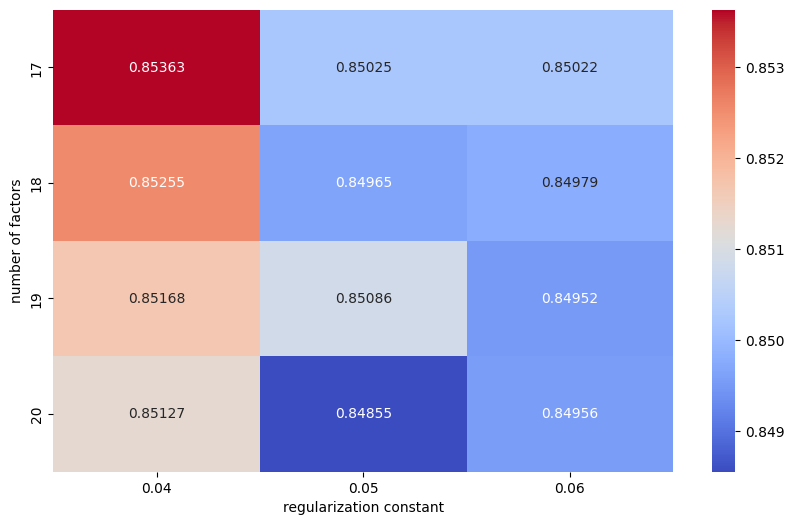

In [22]:
heatmap_data = gs_df.pivot(index="param_n_factors", columns="param_reg_all", values="mean_test_rmse")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".5f", cmap="coolwarm")
plt.title("")
plt.xlabel("regularization constant")
plt.ylabel("number of factors")
plt.show()

## Model Training

In [18]:
%run ../core/train_svdpp.py

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
 processing epoch 20
 processing epoch 21
 processing epoch 22
 processing epoch 23
 processing epoch 24
 processing epoch 25
 processing epoch 26
 processing epoch 27
 processing epoch 28
 processing epoch 29


## Model Testing

In [19]:
%run ../core/test_svdpp.py

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
 processing epoch 20
 processing epoch 21
 processing epoch 22
 processing epoch 23
 processing epoch 24
 processing epoch 25
 processing epoch 26
 processing epoch 27
 processing epoch 28
 processing epoch 29
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing 

In [21]:
cv_dict = load_cv("cv_svdpp")

cv_df = pd.DataFrame(cv_dict, index=(f"Fold {k}" for k in range(1, CV_FOLDS + 1)))

cv_df.loc["Mean"] = cv_df.mean(axis=0)
cv_df.loc["Stdev"] = cv_df.std(axis=0)

cv_df.drop(columns=[]).transpose()

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Mean,Stdev
test_rmse,0.847106,0.864709,0.851982,0.840721,0.857853,0.834232,0.860508,0.852390,0.843876,0.841904,0.849528,0.009176
test_mae,0.648776,0.663033,0.649675,0.645562,0.657908,0.639214,0.656014,0.647954,0.650563,0.644267,0.650297,0.006654
fit_time,310.839666,313.067944,311.934020,310.867587,315.854065,316.570822,316.502567,317.005394,124.884689,124.631229,276.215798,75.762096
test_time,14.672470,14.567749,15.293028,14.961627,15.416800,14.580498,15.085659,14.256136,4.904734,4.757556,12.849626,4.023342
test_prec,0.724084,0.702496,0.712573,0.709066,0.694286,0.717995,0.706061,0.699788,0.695617,0.698042,0.706001,0.009395
test_rec,0.672351,0.662992,0.661119,0.668441,0.653408,0.658299,0.655649,0.646897,0.649327,0.655109,0.658359,0.007628
test_f1,0.666157,0.652517,0.654073,0.660365,0.643283,0.652685,0.647125,0.644212,0.639861,0.645857,0.650613,0.007757
